## Week 1 - Logic Gates

In [1]:
def unit_function(y):
    if y>=0: return 1
    else: return 0

In [2]:
import numpy as np
def perceptron_model(w,x,b):
    y = np.dot(w,x) + b
    return unit_function(y)

In [3]:
# tautology
def tautology(x):
    w = 1
    b = 1
    return perceptron_model(w,x,b)

tautology(1), tautology(0)

(1, 1)

In [7]:
# not gate
def not_gate(x):
    w = -1.5
    b = 0.5
    return perceptron_model(w,x,b)

not_gate(1), not_gate(0)

(0, 1)

In [9]:
# or gate
def or_gate(x):
    w = [1,1]
    b = -0.5
    return perceptron_model(w,x,b)

or_gate([1,1]), or_gate([0,1]), or_gate([1,0]), or_gate([0,0])

(1, 1, 1, 0)

In [11]:
# and gate
def and_gate(x):
    w = [1,1]
    b = -2
    return perceptron_model(w,x,b)

and_gate([1,1]), and_gate([0,1]), and_gate([1,0]), and_gate([0,0])

(1, 0, 0, 0)

In [13]:
# nor gate - not or
# nand gate - not and 
# xor gate - complement(A.B).(A+B)
# xnor gate - not xor
def xor_gate(x):
    a = and_gate(x)
    b = or_gate(x)
    c = not_gate(a)
    d = np.array([b,c])
    e = and_gate(d)
    return e

xor_gate([1,1]), xor_gate([0,1]), xor_gate([1,0]), xor_gate([0,0])

(0, 1, 1, 0)

## Week 2 - MNIST(ANN), Linear Regression(Tensorflow)

### MNIST - ANN

In [9]:
import tensorflow, keras
from keras.models import *
from keras.layers import *
import keras.optimizers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [60]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [61]:
x_train_reshaped = x_train.reshape(x_train.shape[0],784)
x_test_reshaped = x_test.reshape(x_test.shape[0],784)

In [62]:
x_train_reshaped.shape

(60000, 784)

In [63]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(32,activation='softmax'))

In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='acc')

In [65]:
history = model.fit(x_train_reshaped, y_train, epochs=15, validation_data=(x_test_reshaped,y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3627 - acc: 0.9082 - val_loss: 0.1526 - val_acc: 0.9560
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1205 - acc: 0.9645 - val_loss: 0.1022 - val_acc: 0.9672
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0783 - acc: 0.9765 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0563 - acc: 0.9833 - val_loss: 0.0804 - val_acc: 0.9743
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - acc: 0.9880 - val_loss: 0.0807 - val_acc: 0.9743
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0765 - val_acc: 0.9769
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0255 - acc: 0.9926 - val_loss: 0.0701 - val_acc: 0.9795
Epoch 8/15
1875/1875 [==============================] - 6s 3ms

In [66]:
model.evaluate(x_train_reshaped,y_train)[1]

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0061 - acc: 0.9982


0.9981833100318909

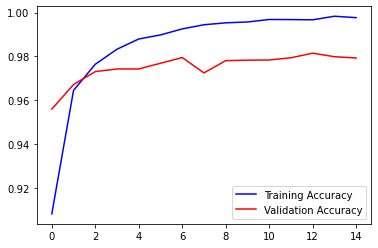

In [67]:
plt.plot(history.history['acc'],label='Training Accuracy',c='b')
plt.plot(history.history['val_acc'],label='Validation Accuracy',c='r')
plt.legend()
plt.show()

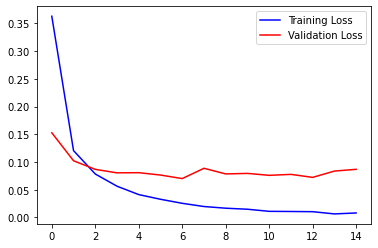

In [68]:
plt.plot(history.history['loss'],label='Training Loss',c='b')
plt.plot(history.history['val_loss'],label='Validation Loss',c='r')
plt.legend()
plt.show()

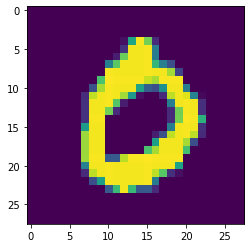

In [75]:
plt.imshow(x_test[3])

In [76]:
pred = model.predict(x_test_reshaped)

313/313 [==============================] - 0s 2ms/step


In [77]:
pred = np.argmax(pred,axis=1)
print(pred[3])

0


### Linear Regression - Tensorflow

In [91]:
np.random.seed(100)
x = np.random.random_sample(500).reshape(-1,1)
y = x*2 + 0.5*np.random.random_sample(500).reshape(-1,1)

In [92]:
learning_rate = 0.01
training_epochs = 1000

In [93]:
model = Sequential()
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate), loss='mean_squared_error')

In [94]:
model.fit(x, y, epochs=training_epochs)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1399 - acc: 0.0000e+00
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0390 - acc: 0.0000e+00
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0202 - acc: 0.0000e+00
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0206 - acc: 0.0000e+00
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 84/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 85/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 86/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 87/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 88/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 89/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 90/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 91/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 92/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 93/1000


16/16 [==============================] - 0s 2ms/step - loss: 0.0202 - acc: 0.0000e+00
Epoch 246/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 247/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 248/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 249/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 250/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 251/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 252/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 253/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 254/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.0000e+00
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 408/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 409/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 410/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 411/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 412/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 413/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 414/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.0000e+00
Epoch 415/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.0000e+00
Epoch 416/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 570/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 571/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 572/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 573/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 574/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.0000e+00
Epoch 575/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 576/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 577/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 578/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 732/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 733/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 734/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 735/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 736/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 0.0000e+00
Epoch 737/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 738/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 739/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 740/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 894/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 0.0000e+00
Epoch 895/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 896/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 897/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 898/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 899/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 900/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.0000e+00
Epoch 901/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 902/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch

In [95]:
pred = model.predict(x)

16/16 [==============================] - 0s 2ms/step


In [96]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
print(mean_squared_error(pred,y)), print(median_absolute_error(pred,y)), print(r2_score(pred,y))

0.019967568785761024
0.11883513266338752
0.9396205959248835


(None, None, None)

In [99]:
model.get_weights()[0], model.get_weights()[1]

(array([[1.9633983]], dtype=float32), array([0.25390846], dtype=float32))

## Week 3 - ANN 

In [36]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.25, random_state=32)

In [148]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')

In [149]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 13ms/step - loss: 2.4637 - acc: 0.6233 - val_loss: 0.6849 - val_acc: 0.5573
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.7892 - acc: 0.5747 - val_loss: 0.6559 - val_acc: 0.6510
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 0.7044 - acc: 0.6580 - val_loss: 0.6037 - val_acc: 0.6771
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6837 - acc: 0.6753 - val_loss: 0.5754 - val_acc: 0.7083
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6529 - acc: 0.6806 - val_loss: 0.5700 - val_acc: 0.6667
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.7048 - acc: 0.6962 - val_loss: 0.5653 - val_acc: 0.6823
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6421 - acc: 0.6892 - val_loss: 0.5718 - val_acc: 0.7396
Epoch 8/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6643 - acc: 0.6

In [150]:
acc = model.evaluate(x_train,y_train)[1]
acc

18/18 [==============================] - 0s 2ms/step - loss: 0.6487 - acc: 0.6771


0.6770833134651184

In [154]:
model2 = Sequential()
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='sigmoid'))
model2.add(Dense(64,activation='sigmoid'))
model2.add(Dense(32,activation='softmax'))
model2.add(Dense(1,activation='relu'))
model2.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model2.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 15ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 5.3291 - acc: 0.6545 - val_loss: 5.5433 - val_acc: 0.6406
Epoch 8/20
18/18 [==============================] - 0s 5ms/step - loss: 5.3291 - acc: 0.6

In [158]:
acc2 = model2.evaluate(x_train,y_train)[1]
acc2

18/18 [==============================] - 0s 2ms/step - loss: 5.3291 - acc: 0.6545


0.6545138955116272

In [162]:
model3 = Sequential()
model3.add(Dense(128,activation='relu'))
model3.add(Dense(64,activation='sigmoid'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='sigmoid'))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='relu'))
model3.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model3.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 2.0135 - acc: 0.5347 - val_loss: 0.6606 - val_acc: 0.6406
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 1.8097 - acc: 0.6024 - val_loss: 0.6448 - val_acc: 0.6406
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 1.5451 - acc: 0.5035 - val_loss: 0.6319 - val_acc: 0.6406
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 1.5062 - acc: 0.5712 - val_loss: 0.6405 - val_acc: 0.6406
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 1.2608 - acc: 0.5781 - val_loss: 0.7806 - val_acc: 0.3646
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 1.3582 - acc: 0.5625 - val_loss: 0.6477 - val_acc: 0.6406
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 1.2744 - acc: 0.5625 - val_loss: 0.6433 - val_acc: 0.6406
Epoch 8/20
18/18 [==============================] - 0s 6ms/step - loss: 1.3130 - acc: 0.5

In [163]:
acc3 = model3.evaluate(x_train,y_train)[1]
acc3

18/18 [==============================] - 0s 2ms/step - loss: 0.6382 - acc: 0.6684


0.6684027910232544

In [167]:
from keras.callbacks import EarlyStopping
EarlyStopping?

In [166]:
callbacks = EarlyStopping(monitor='loss',patience=200,verbose=1, mode='min')

In [172]:
model4 = Sequential()
model4.add(Dense(128,activation='relu'))
model4.add(Dense(64,activation='sigmoid'))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model4.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test), callbacks=[callbacks])

Epoch 1/20
18/18 [==============================] - 1s 12ms/step - loss: 0.6559 - acc: 0.6719 - val_loss: 0.6189 - val_acc: 0.6302
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6133 - acc: 0.6580 - val_loss: 0.5947 - val_acc: 0.6406
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5979 - acc: 0.6701 - val_loss: 0.5953 - val_acc: 0.6823
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.5980 - acc: 0.6684 - val_loss: 0.5835 - val_acc: 0.6979
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5994 - acc: 0.6840 - val_loss: 0.5685 - val_acc: 0.6979
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5912 - acc: 0.6875 - val_loss: 0.5790 - val_acc: 0.6823
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5834 - acc: 0.6875 - val_loss: 0.5697 - val_acc: 0.7188
Epoch 8/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5779 - acc: 0.6

In [173]:
acc4 = model4.evaluate(x_train,y_train)[1]
acc4

18/18 [==============================] - 0s 2ms/step - loss: 0.5511 - acc: 0.6979


0.6979166865348816

In [175]:
from keras.regularizers import l2

In [176]:
model5 = Sequential()
model5.add(Dense(128,activation='relu', kernel_regularizer='l2'))
model5.add(Dense(64,activation='sigmoid'))
model5.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))
model5.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model5.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test), callbacks=[callbacks])

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: 0.8177 - acc: 0.6215 - val_loss: 0.7725 - val_acc: 0.6406
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.7613 - acc: 0.6545 - val_loss: 0.7466 - val_acc: 0.6406
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.7436 - acc: 0.6580 - val_loss: 0.7322 - val_acc: 0.6406
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.7227 - acc: 0.6597 - val_loss: 0.7226 - val_acc: 0.6458
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.7055 - acc: 0.6736 - val_loss: 0.6986 - val_acc: 0.6615
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6918 - acc: 0.6840 - val_loss: 0.6884 - val_acc: 0.6458
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6850 - acc: 0.6684 - val_loss: 0.6763 - val_acc: 0.6667
Epoch 8/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6746 - acc: 0.6

In [177]:
acc5 = model5.evaluate(x_train,y_train)[1]
acc5

18/18 [==============================] - 0s 2ms/step - loss: 0.6241 - acc: 0.7170


0.7170138955116272

In [182]:
dict1 = {'Model':['model1',"model2",'model3','model4','model5'],
         'Accuracy':[acc,acc2,acc3,acc4,acc5]
        }
data = pd.DataFrame(dict1)

In [183]:
data.head()

,Model,Accuracy
0,model1,0.677083
1,model2,0.654514
2,model3,0.668403
3,model4,0.697917
4,model5,0.717014


## Week 4 - Linear Regression using PyTorch

In [230]:
import torch
import torch.nn as nn
import torch.optim as optim

In [231]:
np.random.seed(0)
x = np.random.rand(100,1)
y = x*2 + 0.1*np.random.rand(100, 1) + 1

In [232]:
x_tensor = torch.tensor(x,dtype=torch.float32)
y_tensor = torch.tensor(y,dtype=torch.float32)

In [233]:
class linear_reg(nn.Module):
    def __init__(self):
        super(linear_reg,self).__init__()
        self.linear=nn.Linear(1,1)
    def forward(self,x):
            return self.linear(x)

In [234]:
model = linear_reg()

In [238]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
epoch = 1000
for i in range(epoch):
    output = model(x_tensor)
    loss = nn.MSELoss()(output,y_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % 100 == 0:
        print(f'Epoch [{i + 1}/{epoch}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1510
Epoch [200/1000], Loss: 0.0891
Epoch [300/1000], Loss: 0.0681
Epoch [400/1000], Loss: 0.0522
Epoch [500/1000], Loss: 0.0401
Epoch [600/1000], Loss: 0.0309
Epoch [700/1000], Loss: 0.0238
Epoch [800/1000], Loss: 0.0184
Epoch [900/1000], Loss: 0.0142
Epoch [1000/1000], Loss: 0.0111


In [239]:
pred = model(x_tensor).detach().numpy()

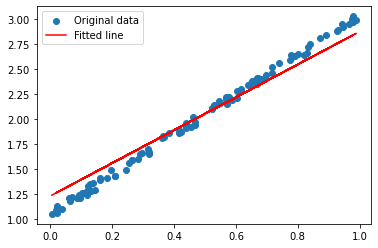

In [240]:
plt.scatter(x, y, label='Original data')
plt.plot(x, pred, label='Fitted line', color='r')
plt.legend()
plt.show()

### Week 5 - CNN 

In [293]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [294]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [295]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [296]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [297]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(10,activation='softmax'))

In [298]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='acc')

In [299]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 77s 48ms/step - loss: 1.4269 - acc: 0.5002 - val_loss: 1.7387 - val_acc: 0.4376
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1145 - acc: 0.6087 - val_loss: 1.0549 - val_acc: 0.6264
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9952 - acc: 0.6475 - val_loss: 0.9401 - val_acc: 0.6691
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9216 - acc: 0.6785 - val_loss: 1.1885 - val_acc: 0.5825
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8592 - acc: 0.6994 - val_loss: 0.9512 - val_acc: 0.6729


In [305]:
pred = model.predict(x_test)
y_pred = np.argmax(pred,axis=1)
y_test = np.argmax(y_test,axis=1)

313/313 [==============================] - 3s 10ms/step


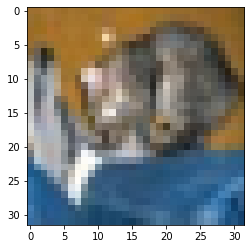

In [306]:
plt.imshow(x_test[0])

In [308]:
y_pred[0]

3

In [309]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

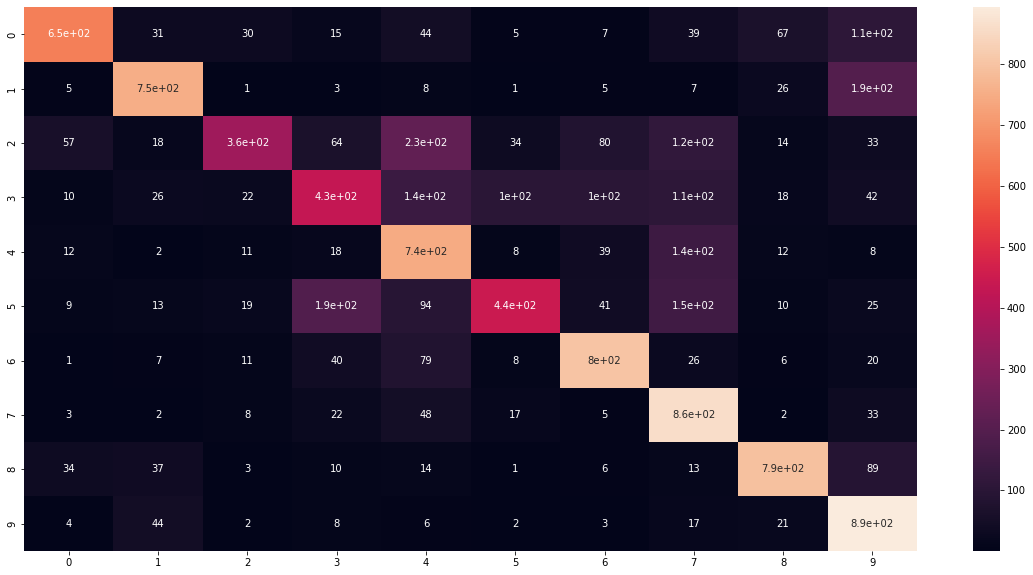

In [310]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

In [313]:
classes = { 0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog",
           6: "frog", 7: "horse", 8: "ship", 9: "truck"}
pred = [classes[i] for i in y_pred]

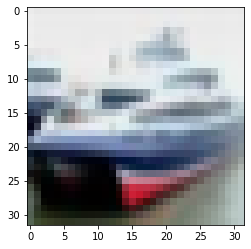

In [314]:
plt.imshow(x_test[1])

In [315]:
pred[1]

'ship'

## Week 6 - ANN and CNN on MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
x_train_ann = x_train.reshape(x_train.shape[0],784) 
x_test_ann = x_test.reshape(x_test.shape[0],784)

x_train_cnn = x_train.reshape(x_train.shape[0],28,28,1)
x_test_cnn = x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
model_ann = Sequential()
model_ann.add(Dense(128,activation='relu'))
model_ann.add(Dense(64,activation='sigmoid'))
model_ann.add(Dense(32,activation='softmax'))
model_ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='acc')
model_ann.fit(x_train_ann,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3671 - acc: 0.9065
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1234 - acc: 0.9634
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0812 - acc: 0.9763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - acc: 0.9827
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - acc: 0.9865
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - acc: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - acc: 0.9919
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0229 - acc: 0.9935
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - acc: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0159 - acc: 0.9953


In [6]:
acc_ann = model_ann.evaluate(x_train_ann,y_train)[1]
acc_ann

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0118 - acc: 0.9967


0.996749997138977

In [8]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(2,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.1))

model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(32,activation='sigmoid'))
model_cnn.add(Dense(10,activation='softmax'))
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='acc')
model_cnn.fit(x_train_cnn,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3069 - acc: 0.9303
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1058 - acc: 0.9687
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0838 - acc: 0.9752
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0749 - acc: 0.9777
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0656 - acc: 0.9805
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0632 - acc: 0.9804
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0586 - acc: 0.9813
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0563 - acc: 0.9825
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0544 - acc: 0.9832
Epoch 10/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0502 - acc: 0.9840


In [9]:
acc_cnn = model_cnn.evaluate(x_train_cnn,y_train)[1]
acc_cnn

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0236 - acc: 0.9930


0.9930333495140076

## Week - 7 - Sentiment Analysis using Simple RNN

In [3]:
from keras.datasets import imdb

In [31]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = 250
x_train = pad_sequences(x_train,maxlen=x)
x_test = pad_sequences(x_test,maxlen=x)

In [33]:
model = Sequential()
model.add(Embedding(vocab_size,50,input_length=x))
model.add(SimpleRNN(50))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')

In [35]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 64s 80ms/step - loss: 0.5946 - acc: 0.6579 - val_loss: 0.5145 - val_acc: 0.7432
Epoch 2/5
782/782 [==============================] - 60s 77ms/step - loss: 0.4011 - acc: 0.8276 - val_loss: 0.4316 - val_acc: 0.8187
Epoch 3/5
782/782 [==============================] - 59s 75ms/step - loss: 0.3905 - acc: 0.8345 - val_loss: 0.5240 - val_acc: 0.7835
Epoch 4/5
782/782 [==============================] - 66s 84ms/step - loss: 0.3073 - acc: 0.8765 - val_loss: 0.4536 - val_acc: 0.8175
Epoch 5/5
782/782 [==============================] - 63s 80ms/step - loss: 0.2505 - acc: 0.9011 - val_loss: 0.4616 - val_acc: 0.8312


In [38]:
model.evaluate(x_train,y_train)[1]

782/782 [==============================] - 13s 17ms/step - loss: 0.1820 - acc: 0.9290


0.9289600253105164

## Week 8 - LSTM and GRU

In [4]:
vocab_size = 10000
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=vocab_size)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 250
x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [7]:
model_GRU = Sequential(
    [Embedding(vocab_size,128),
     GRU(128,dropout=0.2),
     Dense(128,activation='relu'),
     Dense(1,activation='sigmoid')
    ]
)

In [12]:
model_GRU.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')

In [13]:
history = model_GRU.fit(x_train, y_train, epochs=2, validation_data=(x_test,y_test))

Epoch 1/2
782/782 [==============================] - 447s 561ms/step - loss: nan - acc: 0.5087 - val_loss: nan - val_acc: 0.5000
Epoch 2/2
782/782 [==============================] - 425s 544ms/step - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000


In [14]:
model_GRU.evaluate(x_train,y_train)[1]

782/782 [==============================] - 93s 118ms/step - loss: nan - acc: 0.5000


0.5

In [ ]:
model_LSTM = Sequential(
    [Embedding(vocab_size,128),
     LSTM(128,dropout=0.2),
     Dense(1,activation='sigmoid')
    ]
)
model_LSTM.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model_LSTM.fit(x_train, y_train, epochs=2, validation_data=(x_test,y_test))

In [ ]:
model_RNN = Sequential(
    [Embedding(vocab_size,50),
     SimpleRNN(50),
     Dense(1,activation='sigmoid')
    ]
)
model_RNN.compile(optimizer='adam',metrics='acc',loss='binary_crossentropy')
model_RNN.fit(x_train, y_train, epochs=2, validation_data=(x_test,y_test))

## Week 9 - Text Generation using GRU

In [19]:
with open('poems.txt',"r") as file:
    text = file.read()

In [3]:
poem = """
Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is also great
And would suffice.

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.
"""

In [121]:
text = poem

In [122]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)

In [123]:
[encoded] = np.array(tokenizer.texts_to_sequences([text])) - 1
encoded

array([12, 18, 14, ...,  1, 25, 12])

In [124]:
voc_len = len(tokenizer.word_index)
seq_len = 100
dataset = tf.data.Dataset.from_tensor_slices(encoded)
dataset = dataset.batch(seq_len+1, drop_remainder=True)
dataset = dataset.map(lambda x : (x[:-1], x[1:]))
BATCH_SIZE = 32
dataset = dataset.shuffle(1000).batch(BATCH_SIZE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(voc_len, 64),
    tf.keras.layers.GRU(1024, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(voc_len, activation='relu')
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam'
)

In [127]:
model.fit(dataset, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 5.0216
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 4.1541
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 3.9844
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 3.8922
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 3.8207
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 3.7542
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 3.5609
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 3.5170
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 3.5513
Epoch 10/10
1/1 [==============================] - 3s 3s/step - loss: 3.5515


In [128]:
model.evaluate(dataset)

1/1 [==============================] - 2s 2s/step - loss: 3.5401


3.540050506591797

In [129]:
def next_char(s):
    input_seq = np.array(tokenizer.texts_to_sequences([s])) - 1
    model_out = model(input_seq)
    output_seq = np.argmax(model_out, axis=-1) + 1
    last_letter = tokenizer.sequences_to_texts(output_seq)[0][-1]
    return last_letter
def generate(s, count=10):
    for _ in range(count):
        s += next_char(s)
    return s

In [132]:
generate("I doubted if ",1)

'I doubted if f'

In [2]:
text = poem

In [3]:
vocabulary = sorted(list(set(text)))
char_to_indices = dict((c,i) for i,c in enumerate(vocabulary))
indices_to_char = dict((i,c) for i,c in enumerate(vocabulary))

In [4]:
max_length=100
steps=5
sentences=[]
next_chars=[]
for i in range(0,len(text)-max_length,steps):
    sentences.append(text[i:i+max_length])
    next_chars.append(text[i+max_length])

In [7]:
X = np.zeros((len(sentences),max_length,len(vocabulary)),dtype=bool)
y = np.zeros((len(sentences),len(vocabulary)),dtype=bool)

In [8]:
for i,sentence in enumerate(sentences):
    for t,char in enumerate(sentence):
        X[i,t,char_to_indices[char]]=1
    y[i,char_to_indices[next_chars[i]]]=1

In [10]:
model = Sequential([
    GRU(128,input_shape=(max_length,len(vocabulary))),
    Dense(len(vocabulary)),
    Activation('softmax')
])
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)

In [11]:
# helper function to sample the next char
def sample_index(preds,temperature=1.0):
    preds=np.asarray(preds).astype('float64')
    preds=np.log(preds)/temperature
    exp_preds=np.exp(preds)
    preds=exp_preds/np.sum(exp_preds)
    probas=np.random.multinomial(1,preds,1)
    return np.argmax(probas)

In [13]:
from keras.callbacks import *
# Helper function to generate text after the end of each epoch 
def on_epoch_end(epoch, logs): 
    print() 
    print('----- Generating text after Epoch: % d' % epoch) 
    start_index = random.randint(0, len(text) - max_length - 1) 
    for diversity in [0.2, 0.5, 1.0, 1.2]: 
        print('----- diversity:', diversity) 
        generated = '' 
        sentence = text[start_index: start_index + max_length] 
        generated += sentence 
        print('----- Generating with seed: "' + sentence + '"') 
        sys.stdout.write(generated) 
        for i in range(400): 
            x_pred = np.zeros((1, max_length, len(vocabulary))) 
            for t, char in enumerate(sentence): 
                x_pred[0, t, char_to_indices[char]] = 1.
            preds = model.predict(x_pred, verbose = 0)[0] 
            next_index = sample_index(preds, diversity) 
            next_char = indices_to_char[next_index] 
            generated += next_char 
            sentence = sentence[1:] + next_char 
            sys.stdout.write(next_char) 
            sys.stdout.flush() 
        print() 
print_callback = LambdaCallback(on_epoch_end = on_epoch_end) 

In [14]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only = True, mode ='min') 

In [15]:
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2, patience = 1, min_lr = 0.001) 
callbacks = [print_callback, checkpoint, reduce_alpha] 

In [16]:
model.fit(X,y,epochs=30,callbacks=callbacks)

Epoch 1/30
11/11 [==============================] - 8s 121ms/step - loss: 3.5349
Epoch 2/30
11/11 [==============================] - 1s 120ms/step - loss: 2.7448
Epoch 3/30
11/11 [==============================] - 1s 114ms/step - loss: 2.3900
Epoch 4/30
11/11 [==============================] - 1s 113ms/step - loss: 2.1125
Epoch 5/30
11/11 [==============================] - 1s 117ms/step - loss: 1.8293
Epoch 6/30
11/11 [==============================] - 1s 118ms/step - loss: 1.5295
Epoch 7/30
11/11 [==============================] - 1s 113ms/step - loss: 1.2334
Epoch 8/30
11/11 [==============================] - 1s 113ms/step - loss: 0.9624
Epoch 9/30
11/11 [==============================] - 1s 127ms/step - loss: 0.6337
Epoch 10/30
11/11 [==============================] - 2s 150ms/step - loss: 0.4598
Epoch 11/30
11/11 [==============================] - 1s 124ms/step - loss: 0.3078
Epoch 12/30
11/11 [==============================] - 2s 134ms/step - loss: 0.1760
Epoch 13/30
11/11 [======

In [19]:
import random
def generate_text(length, diversity): 
    start_index = random.randint(0, len(text) - max_length - 1) 
    generated = '' 
    sentence = text[start_index: start_index + max_length] 
    generated += sentence 
    for i in range(length): 
            x_pred = np.zeros((1, max_length, len(vocabulary))) 
            for t, char in enumerate(sentence): 
                x_pred[0, t, char_to_indices[char]] = 1.
            preds = model.predict(x_pred, verbose = 0)[0] 
            next_index = sample_index(preds, diversity) 
            next_char = indices_to_char[next_index] 
            generated += next_char 
            sentence = sentence[1:] + next_char 
    return generated 
print(generate_text(500, 0.2)) 

 sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
d han the bandere
TTw wroam faery thave passundererout sand thavey it  tasderorout fereecce cassg was y thaveroroass alss assy 
ausd deroe assald dhir fereccceassy thaverciis  tasdere
OTw wroam fandereeey it for at as y wan g tead 
Tu whave pit feroecy thaverpeim  randere
TTw wroam feee classy in  tasderorous y thave cbande I hand thavey it spavir fereecceandere
TTw wroam faery it feroat he casss and thavey it  tasderorout fereececeraDsy 
I thav hit feroecy thave passundererout sand thavey it  t


## Week 10 - CIFAR 10 CNN - already done

## Week 11 - Credit Card Fraud Detection (RandomForestClassifier)

In [37]:
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [41]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [47]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,random_state=23,test_size=0.25)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [50]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
pred = rfc.predict(x_test)

In [52]:
from sklearn.metrics import *
print(accuracy_score(pred,y_test))
print(precision_score(pred,y_test))
print(recall_score(pred,y_test))
print(f1_score(pred,y_test))

0.9996769753658605
0.8632478632478633
0.9351851851851852
0.8977777777777779


In [59]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71094
           1       0.86      0.94      0.90       108

    accuracy                           1.00     71202
   macro avg       0.93      0.97      0.95     71202
weighted avg       1.00      1.00      1.00     71202



In [56]:
print(confusion_matrix(pred,y_test))

[[71078    16]
 [    7   101]]


In [60]:
correlation_matrix = np.corrcoef(y_test,pred)
print(correlation_matrix)

[[1.        0.8983375]
 [0.8983375 1.       ]]


## Week 12 - Simple Autoencoder on MNIST

### Vanilla AE

In [110]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

In [113]:
input_img = Input((784,))
encoded = Dense(32,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input((32,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoded_layer(encoded_input))

In [114]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1619
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1043
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0964
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0950
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0946
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0943
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0941
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0939
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0938


In [115]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [122]:
encoded_imgs.shape, decoded_imgs.shape

((10000, 32), (10000, 784))

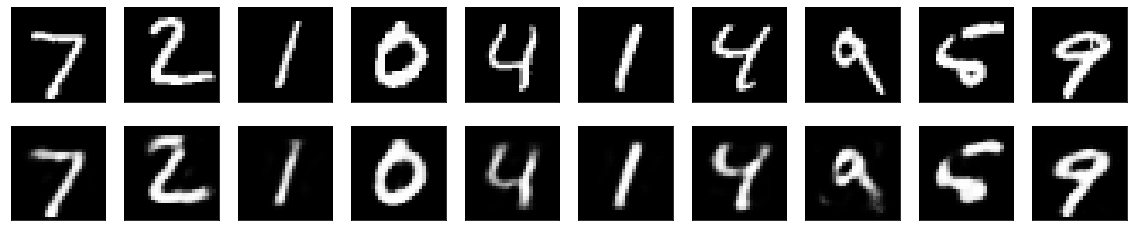

In [126]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.xticks([]); plt.yticks([])

plt.show()

### Convolutional AE

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [77]:
x_train.shape

(60000, 28, 28)

In [78]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [79]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(size=x_train.shape)
x_test_noisy = x_test+noise_factor*np.random.normal(size=x_test.shape)

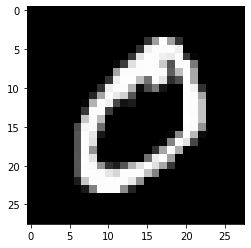

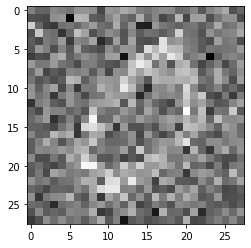

In [80]:
plt.gray()
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train_noisy[1])

In [81]:
x_train_noisy = np.clip(x_train_noisy,0,1)
x_test_noisy = np.clip(x_test_noisy,0,1)

In [86]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1,(3,3),padding='same',activation='relu'))

In [87]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 8)        

In [103]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [107]:
model.fit(x_train_noisy,x_train, epochs=5, validation_data=(x_test_noisy,x_test_noisy))

Epoch 1/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0210 - val_loss: 0.1151
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0199 - val_loss: 0.1147
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0196 - val_loss: 0.1153
Epoch 4/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0193 - val_loss: 0.1150
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0191 - val_loss: 0.1153


In [108]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 4s 12ms/step


In [117]:
pred.shape

(10000, 28, 28, 2)

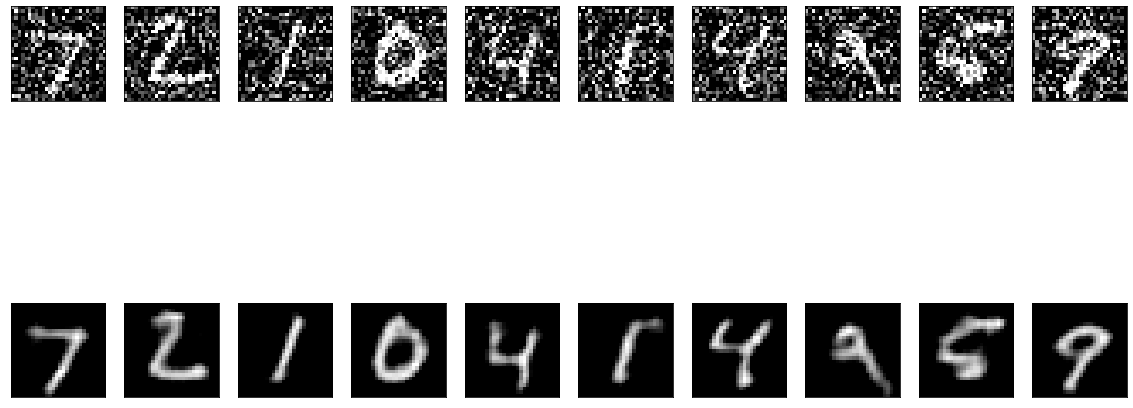

In [118]:
plt.figure(figsize=(20,10))
n = 10
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(2,n,i+1+n)
    plt.imshow(pred[i].reshape(28,28))
#    plt.imshow(pred[i][:, :, 0].reshape(28, 28)) - use if u encounter any error
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Week 13 - Object Detection using AE

In [47]:
from keras.datasets import mnist, fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train_anamoly,y_train_anamoly),(x_test_anamoly,y_test_anamoly) = fashion_mnist.load_data()

In [48]:
x_train.shape, x_train_anamoly.shape

((60000, 28, 28), (60000, 28, 28))

In [49]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train_anamoly = x_train_anamoly.reshape(x_train_anamoly.shape[0],28,28,1)

In [50]:
x_train = x_train.astype('float32')/255
x_train_anamoly = x_train_anamoly.astype('float32')/255

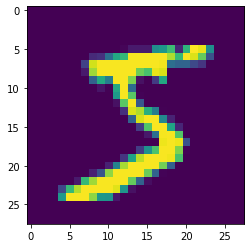

In [51]:
plt.imshow(x_train[0])

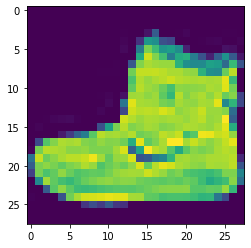

In [52]:
plt.imshow(x_train_anamoly[0])

In [53]:
model = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2),padding='same'),
    Conv2D(8,(3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2),padding='same'),
    Conv2D(8,(3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2),padding='same'),
    
    Conv2D(8,(3,3),padding='same',activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(8,(3,3),padding='same',activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(8,(3,3),activation='relu'),
    UpSampling2D((2,2)),
    
    Conv2D(1,(3,3),padding='same',activation='softmax')
])

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,x_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 258s 122ms/step - loss: 0.8507
Epoch 2/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.8507
Epoch 3/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.8507
Epoch 4/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.8507
Epoch 5/5
1875/1875 [==============================] - 113s 60ms/step - loss: 0.8507


In [77]:
pred = model.predict(x_test)
pred_anamoly = model.predict(x_test_anamoly)

313/313 [==============================] - 8s 24ms/step


In [98]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test_anamoly = x_test_anamoly.reshape(x_test_anamoly.shape[0],28,28,1)

In [99]:
pred.shape, x_test.shape

((10000, 28, 28, 1), (10000, 28, 28, 1))

In [120]:
threshold = 0.05

mse_mnist = np.mean(np.square(pred-x_test))
mse_fmnist = np.mean(np.square(pred_anamoly-x_test_anamoly))

a = mse_mnist<threshold
b = mse_fmnist>threshold

print('Anamoly Detection for MNIST - ',a)
print('Anamoly Detection for Fashion MNIST - ',b)

Anamoly Detection for MNIST -  False
Anamoly Detection for Fashion MNIST -  True


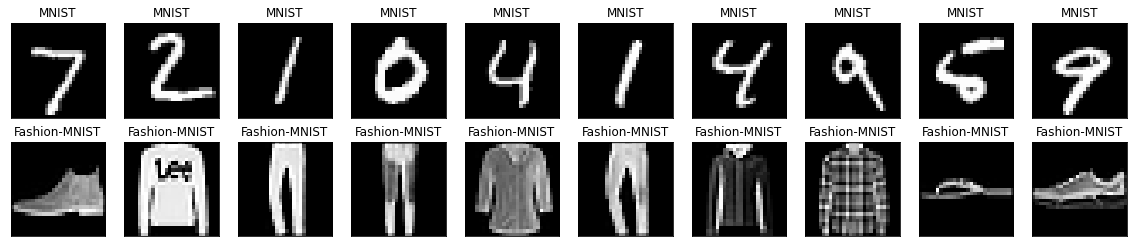

In [94]:
plt.figure(figsize=(20, 4))
n = 10
for i in range(10):
    plt.gray()
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("MNIST")
    plt.xticks([]), plt.yticks([])

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_anamoly[i].reshape(28, 28))
    plt.title("Fashion-MNIST")    
    plt.xticks([]), plt.yticks([])

plt.show()